## Testing for ploidy in <i>Carassius</i> SNP data

It is known that in triploids exist in Carassius, particularly in the C. auratus spp. Here I want to check the RADseq data for signs of polyploidy. 

If a sample is triploid, any polymorphic loci will have skewed allele coverage ratios. Even if a sample is tetraploid, if one allele is generally lower frequency than the other (which is mostly the case) then ABBB or AAAB allele combinations will be more likely than AABB. Thus a skew will still exist. So, we can simply compare the allele ratios at each locus in a sample and it should predict ploidy. At least it will tell us whether samples are 2n or 3n and above. 

There are a couple of considerations with this approach though. When dealing with ratios, small numbers are much more sensitive to noise - which is an inherant property of coverage data. For example, if a locus has 6 reads, 3 for one allele and 3 for another, then the allelic ratio will be 3/3 = 1, but if just one read is misallocated that gives 4/2 = 2! However if the depth is say, 20, 10/10 = 1 and with a single misallocated read, 11/9 = 1.2, i.e. a much lower peterbation of the ratio. So I will concentrate only on loci with good coverage (though I will test several coverage thresholds). 

However, it may be that the coverages in this dataset are still too low to be noisy, but the variance in allele ratios of each loci are still likely to be much higher in the polyploids. 

<b>So the approach is:</b>

For each sample:  
    1) Filter out loci that are not heterozygous  
    2) Filter out loci that have a coverage below a specific threshold.  
    3) Calculate allelic coverage ratios for retained loci in each sample  
    4) Compare ratio distributions between samples (stats tbc)  
    
<b>The dataset:</b>  
I will use the VCF which I used for the PCA, which has loci only found in all parental species. 




In [396]:
import sys
from matplotlib import pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 14})

sys.path.append("/usr/local/lib/python3.8/dist-packages/")

In [41]:
VCFpath = "/home/djeffrie/Data/Crucian/Populations_outs/Populations_ALL_p7_r0.65_min_mac2_spp/populations.snps.vcf"

In [1]:
VCFpath = "/Users/dj20y461/Data_temp/Carassius/triploids_analysis/populations.snps.vcf"

In [75]:
import random

lst = [20,30]

random.sample(lst,1)

[20]

In [216]:
import numpy as np
import random

Cov_min = 20
Cov_max = 60

randomise = True

cov_ratios = {}
cov_loci = {}

with open(VCFpath) as VCFhandle:
    
    for line in VCFhandle:
        
        if line.startswith("##"):
            pass
        
        elif line.startswith("#CHROM"):
            samples = line.split()[9:]
            
            for sample in samples:
                if sample not in cov_ratios:
                    cov_ratios[sample] = []
                    
                if sample not in cov_loci:
                    cov_loci[sample] = {}

            
        else:
            
            ID = line.split()[2]
            GTs = line.split()[9:]
            REF = line.split()[3]
            ALT = line.split()[4]
            
            sample_indexes = range(len(samples))
            
            for sample_index in sample_indexes:
                sample_name = samples[sample_index]
                GTfield = GTs[sample_index]
                #print(sample_name, GTfield)
                
                if GTfield != "./.":
                    GT = GTfield.split(":")[0]
                    DP = int(GTfield.split(":")[1])

                    #print(ID, sample_name, GTfield.split(":")[2].split(","))

                    if all([GT in ["0/1", "1/0"], Cov_max >= DP >= Cov_min]):
                        
                        #### Calculate allele depth ratio
                        ADs = [int(i) for i in GTfield.split(":")[2].split(",")]
                                       
                        ## If want to randomise which allele is chosen each time . . . 
                        
                        REF_allele_cov = ADs[0]
                        ALT_allele_cov = ADs[1]
                        
                        if randomise == True:
                            
                            if ADs[0] == ADs[1]:
                                A1 = ADs[0]
                                A2 = ADs[1]

                            else:
                                A1 = random.sample(ADs,1)[0]
                                for i in ADs:
                                    if i != A1:
                                        A2 = i

                        else:
                            A1 = max(ADs)
                            A2 = min(ADs)
                                                
                        #print(A1,A2)
                        AD_ratio = A1/(A1+A2)
                        
                        #print(sample_name, GT, DP, ADs, AD_ratio)

                        cov_ratios[sample_name].append(AD_ratio)
                        cov_loci[sample_name][ID.replace(":","_")] = {}
                        cov_loci[sample_name][ID.replace(":","_")][REF] = REF_allele_cov
                        cov_loci[sample_name][ID.replace(":","_")][ALT] = ALT_allele_cov
            


In [311]:
cov_ratios

{'BEL1_15': [0.5,
  0.5,
  0.7272727272727273,
  0.1951219512195122,
  0.43333333333333335,
  0.45454545454545453,
  0.5277777777777778,
  0.5263157894736842,
  0.5263157894736842,
  0.5263157894736842,
  0.35135135135135137,
  0.5238095238095238,
  0.5098039215686274,
  0.49019607843137253,
  0.49019607843137253,
  0.5098039215686274,
  0.5416666666666666,
  0.43478260869565216,
  0.5666666666666667,
  0.4897959183673469,
  0.5652173913043478,
  0.5185185185185185,
  0.6,
  0.4166666666666667,
  0.44,
  0.5,
  0.4,
  0.75,
  0.5806451612903226,
  0.3448275862068966,
  0.6666666666666666,
  0.35714285714285715,
  0.48484848484848486,
  0.6,
  0.4583333333333333,
  0.32,
  0.5769230769230769,
  0.52,
  0.53125,
  0.4807692307692308,
  0.375,
  0.5238095238095238,
  0.6129032258064516,
  0.5555555555555556,
  0.48148148148148145,
  0.5294117647058824,
  0.47058823529411764,
  0.5555555555555556,
  0.6,
  0.6,
  0.47619047619047616,
  0.5319148936170213,
  0.3333333333333333,
  0.5,
  0.4

In [313]:
samples

['BEL1_15',
 'BEL1_16',
 'BEL1_17',
 'BEL1_18',
 'BEL1_19',
 'BEL5_2',
 'BEL5_3',
 'BEL5_4',
 'BEL5_5',
 'BEL5_6',
 'DEN1_10',
 'DEN1_11',
 'DEN1_12',
 'DEN1_3',
 'DEN1_4',
 'DEN1_5',
 'DEN1_6',
 'DEN1_7',
 'DEN1_8',
 'DEN1_9',
 'DEN2_1',
 'DEN2_2',
 'DEN2_3',
 'DEN2_4',
 'DEN2_5',
 'DEN2_6',
 'DEN2_7',
 'DEN2_8',
 'FIN2_34',
 'FIN2_35',
 'FIN2_36',
 'FIN2_37',
 'FIN2_38',
 'FIN2_39',
 'FIN3_10',
 'FIN3_1',
 'FIN3_2',
 'FIN3_3',
 'FIN3_4',
 'FIN3_5',
 'FIN3_6',
 'FIN3_7',
 'FIN3_8',
 'FIN3_9',
 'FIN4_1',
 'FIN4_3',
 'FIN4_4',
 'FIN4_5',
 'FIN4_6',
 'FIN4_7',
 'FIN4_8',
 'FIN4_9',
 'GBR10_22',
 'GBR10_23',
 'GBR10_24',
 'GBR10_25',
 'GBR10_26',
 'GBR10_27',
 'GBR10_28',
 'GBR10_30',
 'GBR10_31',
 'GBR10_32',
 'GBR10_33',
 'GBR10_34',
 'GBR10_35',
 'GBR10_36',
 'GBR10_37',
 'GBR14_52',
 'GBR14_60',
 'GBR15_4',
 'GBR15_5',
 'GBR15_6',
 'GBR15_7',
 'GBR15_8',
 'GBR16_28',
 'GBR16_31',
 'GBR16_32',
 'GBR16_33',
 'GBR16_35',
 'GBR16_36',
 'GBR17_1',
 'GBR17_2',
 'GBR17_3',
 'GBR17_6',
 'GBR4

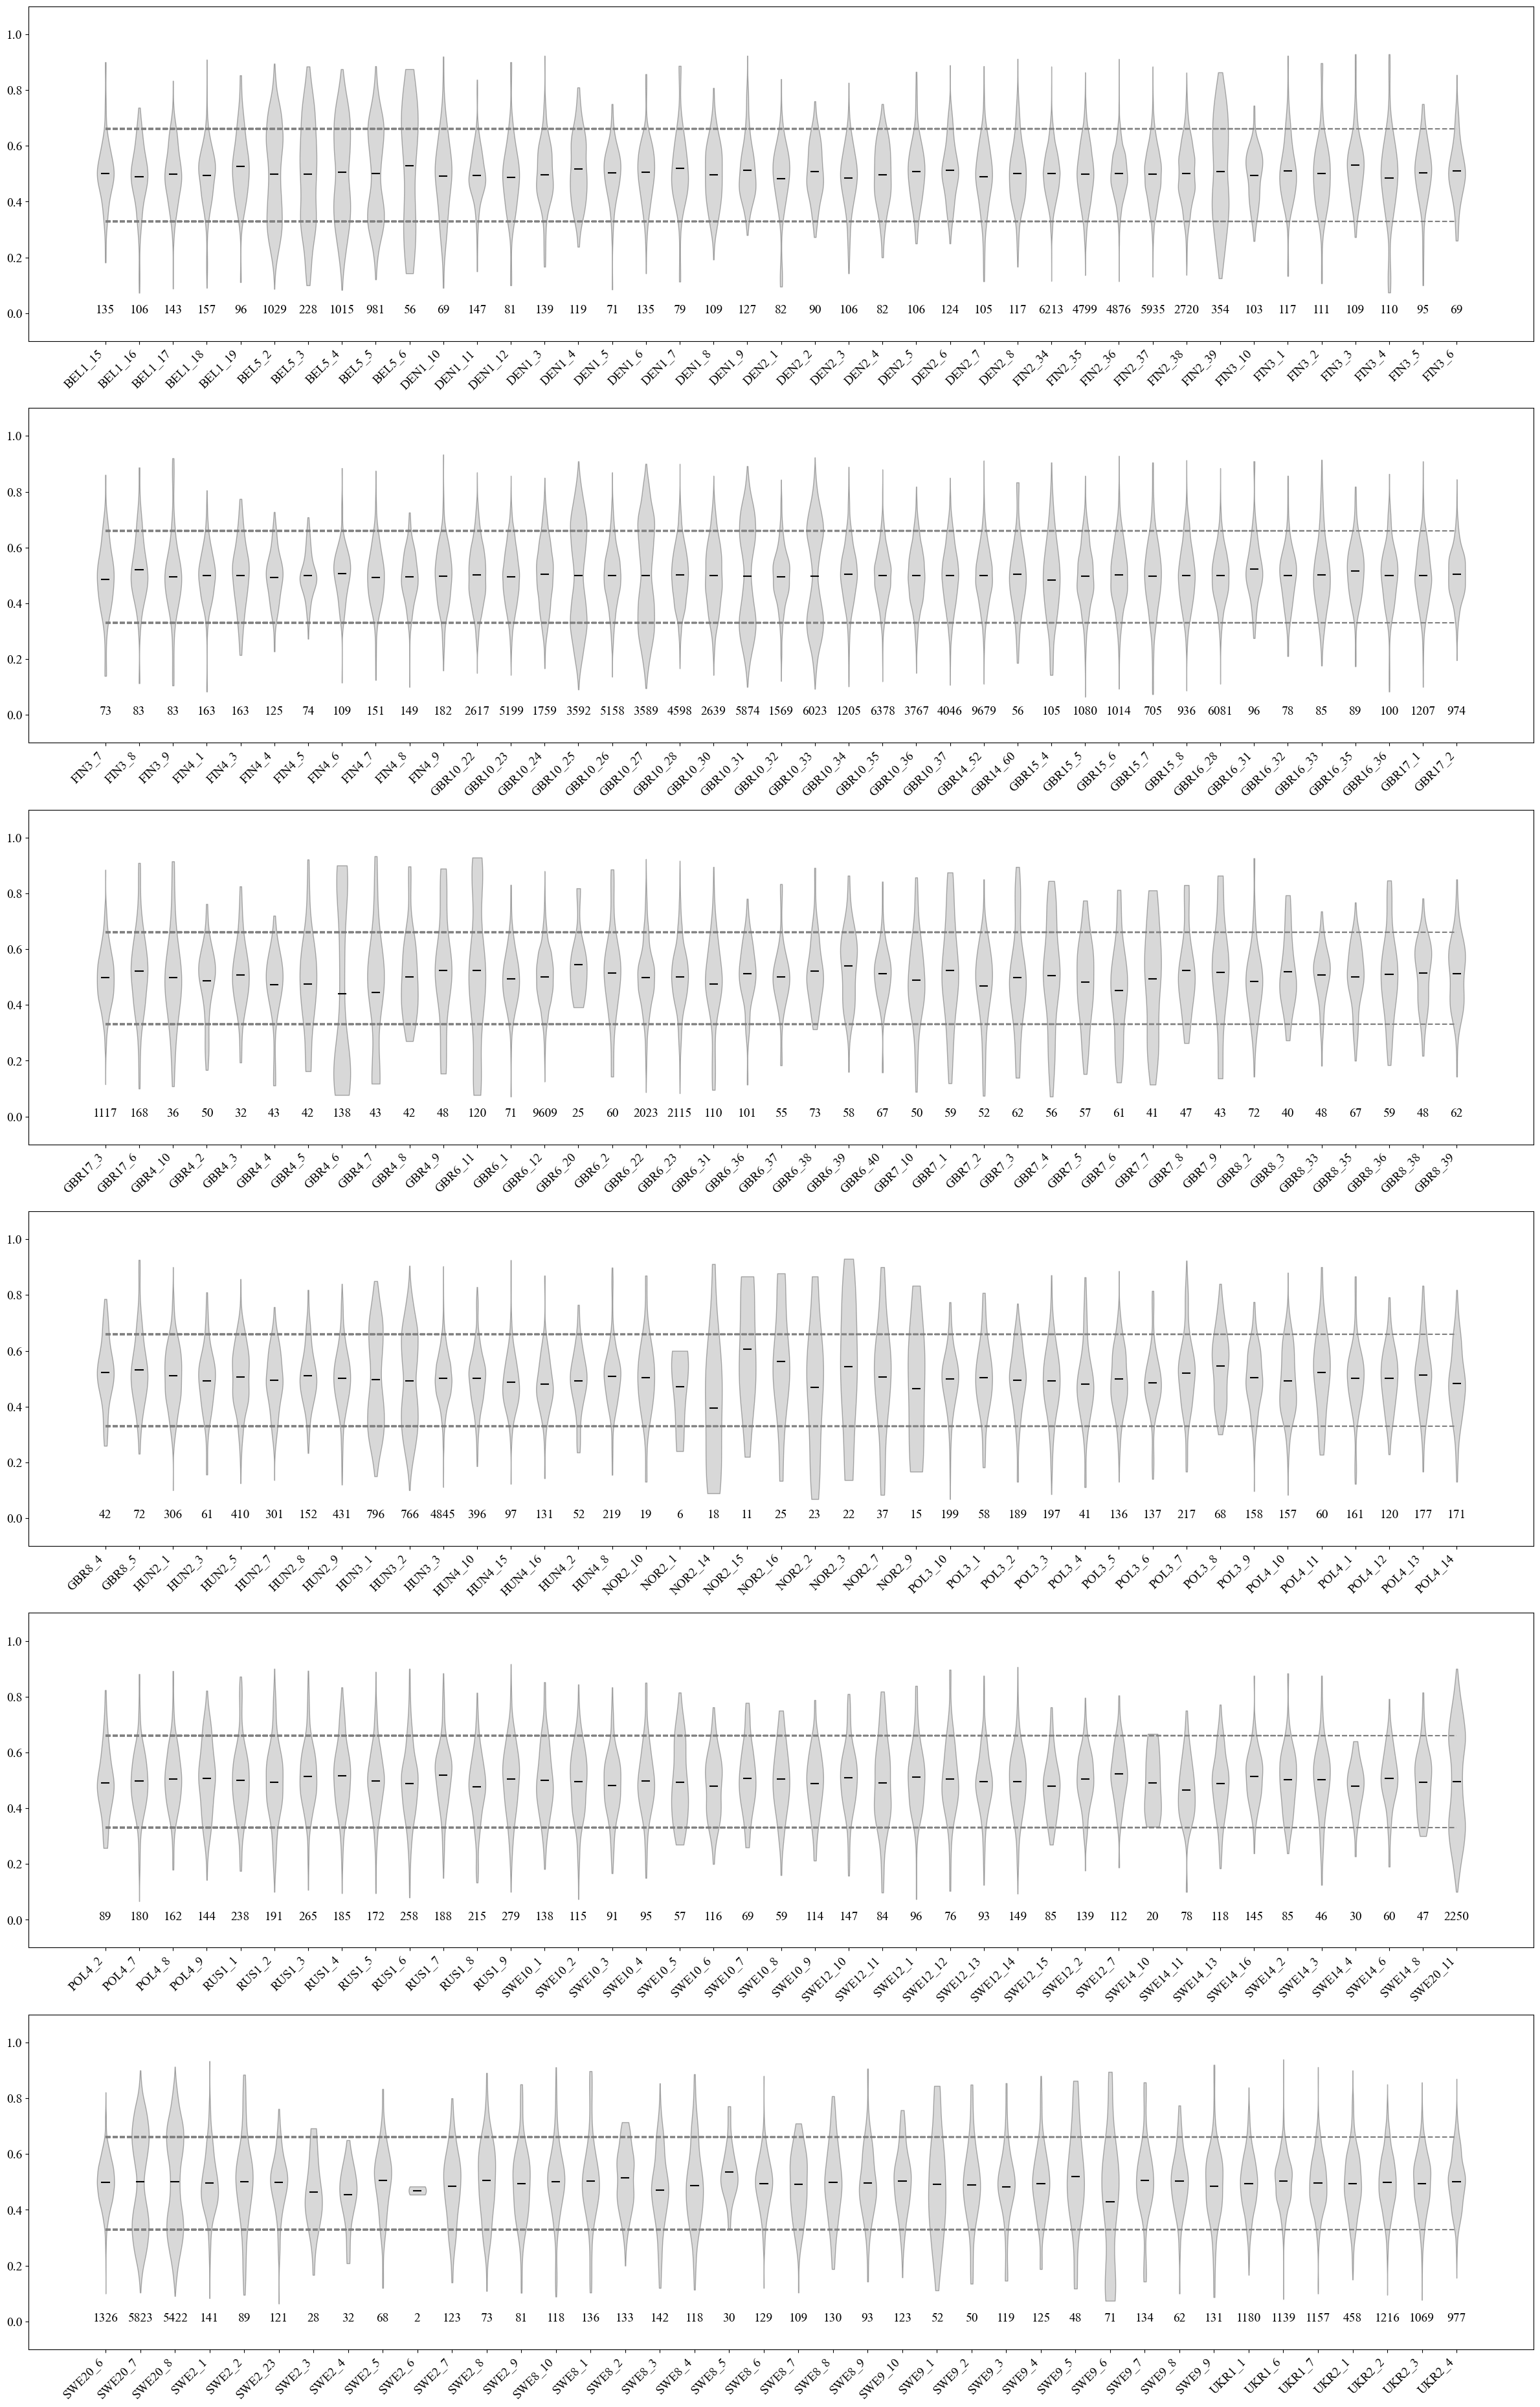

In [397]:
from matplotlib import pyplot as plt
import numpy as np


plt.figure(figsize = (30,47))


sample_start = 0
sample_end = 41
sample_step = 41

for i in range(1,7):
    
    if sample_end >= len(samples):
        sample_end = len(samples) -1
    
    plt.subplot(6,1,i)
    
    x_coord = 1
    xcoords = []
    xlabs = []

    for sample in samples[sample_start:sample_end]:
        if len(cov_ratios[sample]) > 1:
            #print(sample)
            xcoords.append(x_coord)
            xlabs.append(sample)
            vio = plt.violinplot(cov_ratios[sample], positions = [x_coord], showmeans = True, showextrema = False)
            for pc in vio["bodies"]:
                pc.set_facecolor('grey')
                pc.set_edgecolor('Black')
            vio["cmeans"].set_edgecolor("Black")
            #plt.scatter([x_coord]*len(cov_ratios[sample]), cov_ratios[sample], s = 0.8, c = "grey")
            plt.hlines(0.33,1,max(xcoords), linestyles="dashed", color = "grey")
            plt.hlines(0.66,1,max(xcoords), linestyles="dashed", color = "grey")
            plt.text(x_coord, 0.0, "%s" % len(cov_ratios[sample]), ha = "center")
            x_coord += 1
       
        plt.xticks(xcoords, xlabs, rotation = 45, ha = "right")
        plt.ylim(-0.1,1.1)
            
    sample_start += sample_step
    sample_end += sample_step
    
plt.show()


## Identifying modes in allele depth ratios

Now I want to statistically identify the number of modes in each sample's distribution of allele depth ratios, and see where those modes are in the distibution. In triploids there should be two modes (0.33 and 0.66).

The violin plots above are Kernal density estimations (KDE) of each distribution. Annoyingly the KDE itself doesn't seem to be output by the violin function, but it is identical to the scikit learn KDE. So below I will just redo the KDE for each sample. I will then use an approach to identify the "inflexion points" in the KDE to identify the different modes.

The approaches used I found here: https://towardsdatascience.com/modality-tests-and-kernel-density-estimations-3f349bb9e595

The violin plot documentation says they use the "Scott" method to identify the optimal bandwith, a gaussian Kernal and and 100 points to plot the density function, so I will do the same:


In [4]:
## Function to get the inflexion points of a data series . . .

def getExtremePoints(data, typeOfInflexion = None, maxPoints = None):
    """
    This method returns the indeces where there is a change in the trend of the input series.
    typeOfExtreme = None returns all extreme points, max only maximum values and min
    only min,
    """
    a = np.diff(data)
    asign = np.sign(a)
    signchange = ((np.roll(asign, 1) - asign) != 0).astype(int)
    idx = np.where(signchange ==1)[0]
    
    if typeOfInflexion == 'max' and data[idx[0]] < data[idx[1]]:
            idx = idx[1:][::2]

    elif typeOfInflexion == 'min' and data[idx[0]] > data[idx[1]]:
        idx = idx[1:][::2]
    elif typeOfInflexion is not None:
        idx = idx[::2]

    # sort ids by min value
    if 0 in idx:
        idx = np.delete(idx, 0)
    if (len(data)-1) in idx:
        idx = np.delete(idx, len(data)-1)
    idx = idx[np.argsort(data[idx])]
    
    # If we have maxpoints we want to make sure the timeseries has a cutpoint
    # in each segment, not all on a small interval
    if maxPoints is not None:
        idx= idx[:maxPoints]
        if len(idx) < maxPoints:
            return (np.arange(maxPoints) + 1) * (len(data)//(maxPoints + 1))

    return idx

### Testing for SWED20_7 

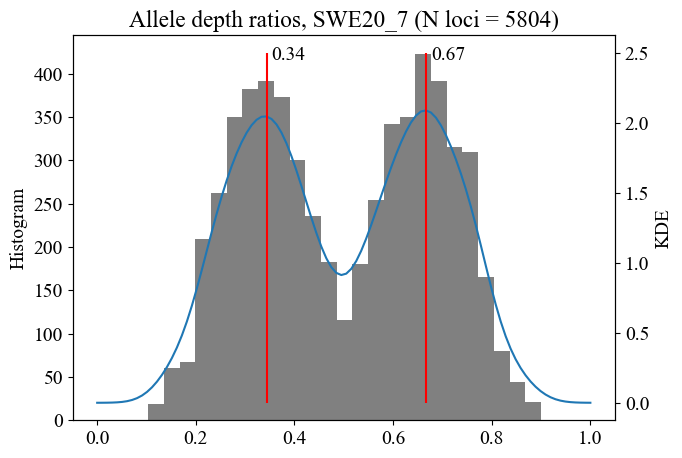

In [398]:
from statsmodels.nonparametric.bandwidths import bw_silverman, bw_scott, select_bandwidth
from sklearn.neighbors import KernelDensity

## prepare data
mydata = np.array(cov_ratios["SWE20_7"])
X = mydata[:, np.newaxis]

## Find best bandwidth for the data
scott_bandwidth_gauss = select_bandwidth(X, bw = 'scott', kernel = 'gauss')[0]

# Make a Gaussian KDE model using an arbitrarily defined bandwidth
kde = KernelDensity(kernel="gaussian", bandwidth=scott_bandwidth_gauss).fit(X)

# Make a set of X values to plot using this KDE
X_plot = np.linspace(0, 1, 100)[:, np.newaxis]

# Generate the Y values (i.e. the density using the KDE model and the supplied X values)
log_dens = kde.score_samples(X_plot)

## Now get the maximal inflexion points (i.e. the peaks of the distributions, which correspond to the modes in the dataset)
idx = getExtremePoints(log_dens, typeOfInflexion = "max")

# plot
plt.figure(figsize = (7,5))

plt.hist(mydata, bins=25, color = "grey")
plt.ylabel("Histogram")
plt.twinx()
plt.plot(X_plot, np.exp(log_dens))
plt.ylabel("KDE")
plt.title("Allele depth ratios, SWE20_7 (N loci = 5804)")

for i in idx:
    plt.vlines(X_plot[i], 0,2.5 , color = 'red')
    plt.text(X_plot[i]+0.01, 2.45, "%s" % np.round(X_plot[i][0],2))
    
plt.show()

Ok, I'm pretty happy with that! Lets see how it works for a sample with a less clear signalKernelDensity

### Testing for FIN2_39 

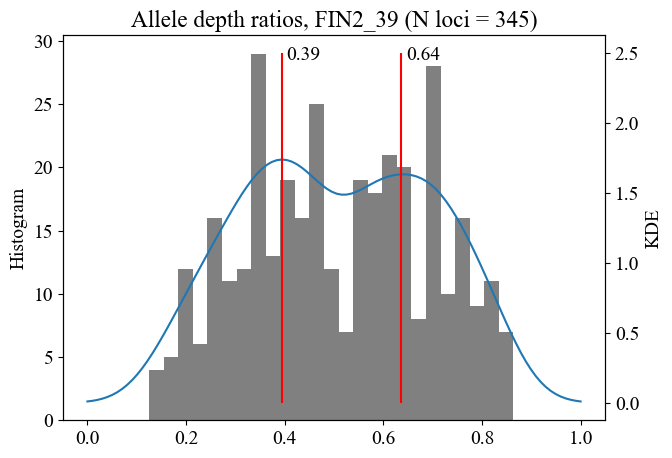

In [399]:
## prepare data
mydata = np.array(cov_ratios["FIN2_39"])
X = mydata[:, np.newaxis]

## Find best bandwidth for the data
scott_bandwidth_gauss = select_bandwidth(X, bw = 'scott', kernel = 'gauss')[0]

# Make a Gaussian KDE model using an arbitrarily defined bandwidth
kde = KernelDensity(kernel="gaussian", bandwidth=scott_bandwidth_gauss).fit(X)

# Make a set of X values to plot using this KDE
X_plot = np.linspace(0, 1, 100)[:, np.newaxis]

# Generate the Y values (i.e. the density using the KDE model and the supplied X values)
log_dens = kde.score_samples(X_plot)

## Now get the maximal inflexion points (i.e. the peaks of the distributions, which correspond to the modes in the dataset)
idx = getExtremePoints(log_dens, typeOfInflexion = "max")

# plot
plt.figure(figsize = (7,5))

plt.hist(mydata, bins=25, color = "grey")
plt.ylabel("Histogram")
plt.twinx()
plt.plot(X_plot, np.exp(log_dens))
plt.ylabel("KDE")
plt.title("Allele depth ratios, FIN2_39 (N loci = 345)")

for i in idx:
    plt.vlines(X_plot[i], 0,2.5 , color = 'red')
    plt.text(X_plot[i]+0.01, 2.45, "%s" % np.round(X_plot[i][0],2))
    
plt.show()

As expected its a bit less clear, but it sill suggests bimodality. 

I will now try this for all samples and add the results to the violin plots.

In [12]:
## Define the function

def Get_modes(sample_data, bw_override = None):
    
    mydata = np.array(sample_data)
    X = mydata[:, np.newaxis]

    ## Find best bandwidth for the data
    scott_bandwidth_gauss = select_bandwidth(X, bw = 'scott', kernel = 'gauss')[0]

    if bw_override:
        kde = KernelDensity(kernel="gaussian", bandwidth=bw_override).fit(X)        
    else:
        # Make a Gaussian KDE model using an arbitrarily defined bandwidth
        kde = KernelDensity(kernel="gaussian", bandwidth=scott_bandwidth_gauss).fit(X)

    # Make a set of X values to plot using this KDE
    X_plot = np.linspace(0, 1, 100)[:, np.newaxis]

    # Generate the Y values (i.e. the density using the KDE model and the supplied X values)
    log_dens = kde.score_samples(X_plot)

    ## Now get the maximal inflexion points (i.e. the peaks of the distributions, which correspond to the modes in the dataset)
    idx = getExtremePoints(log_dens, typeOfInflexion = "max")

    modes = []
    for i in idx:
        modes.append(np.round(X_plot[i][0],2))
    
    return modes

In [13]:
Modes = {}

for sample in cov_ratios:
    
    Modes[sample] = Get_modes(cov_ratios[sample])

In [14]:
Modes

{'BEL1_15': [0.1, 0.88, 0.26, 0.52],
 'BEL1_16': [0.14, 0.89, 0.51],
 'BEL1_17': [0.14, 0.48],
 'BEL1_18': [0.18, 0.82, 0.54],
 'BEL1_19': [0.15, 0.87, 0.45],
 'BEL5_2': [0.66, 0.37],
 'BEL5_3': [0.65, 0.45],
 'BEL5_4': [0.37, 0.63],
 'BEL5_5': [0.65, 0.34],
 'BEL5_6': [0.31, 0.69],
 'DEN1_10': [0.9, 0.47],
 'DEN1_11': [0.85, 0.22, 0.49],
 'DEN1_12': [0.13, 0.89, 0.51],
 'DEN1_3': [0.55],
 'DEN1_4': [0.51],
 'DEN1_5': [0.08, 0.47],
 'DEN1_6': [0.85, 0.17, 0.53],
 'DEN1_7': [0.88, 0.12, 0.46],
 'DEN1_8': [0.45],
 'DEN1_9': [0.08, 0.77, 0.47, 0.53],
 'DEN2_1': [0.13, 0.87, 0.48],
 'DEN2_2': [0.46],
 'DEN2_3': [0.86, 0.49],
 'DEN2_4': [0.47],
 'DEN2_5': [0.51],
 'DEN2_6': [0.11, 0.49],
 'DEN2_7': [0.87, 0.51],
 'DEN2_8': [0.09, 0.52],
 'FIN2_34': [0.88, 0.2, 0.51],
 'FIN2_35': [0.48],
 'FIN2_36': [0.11, 0.87, 0.49],
 'FIN2_37': [0.53],
 'FIN2_38': [0.45, 0.55],
 'FIN2_39': [0.59, 0.36],
 'FIN3_10': [0.46],
 'FIN3_1': [0.9, 0.48],
 'FIN3_2': [0.12, 0.88, 0.51],
 'FIN3_3': [0.92, 0.11, 0.47

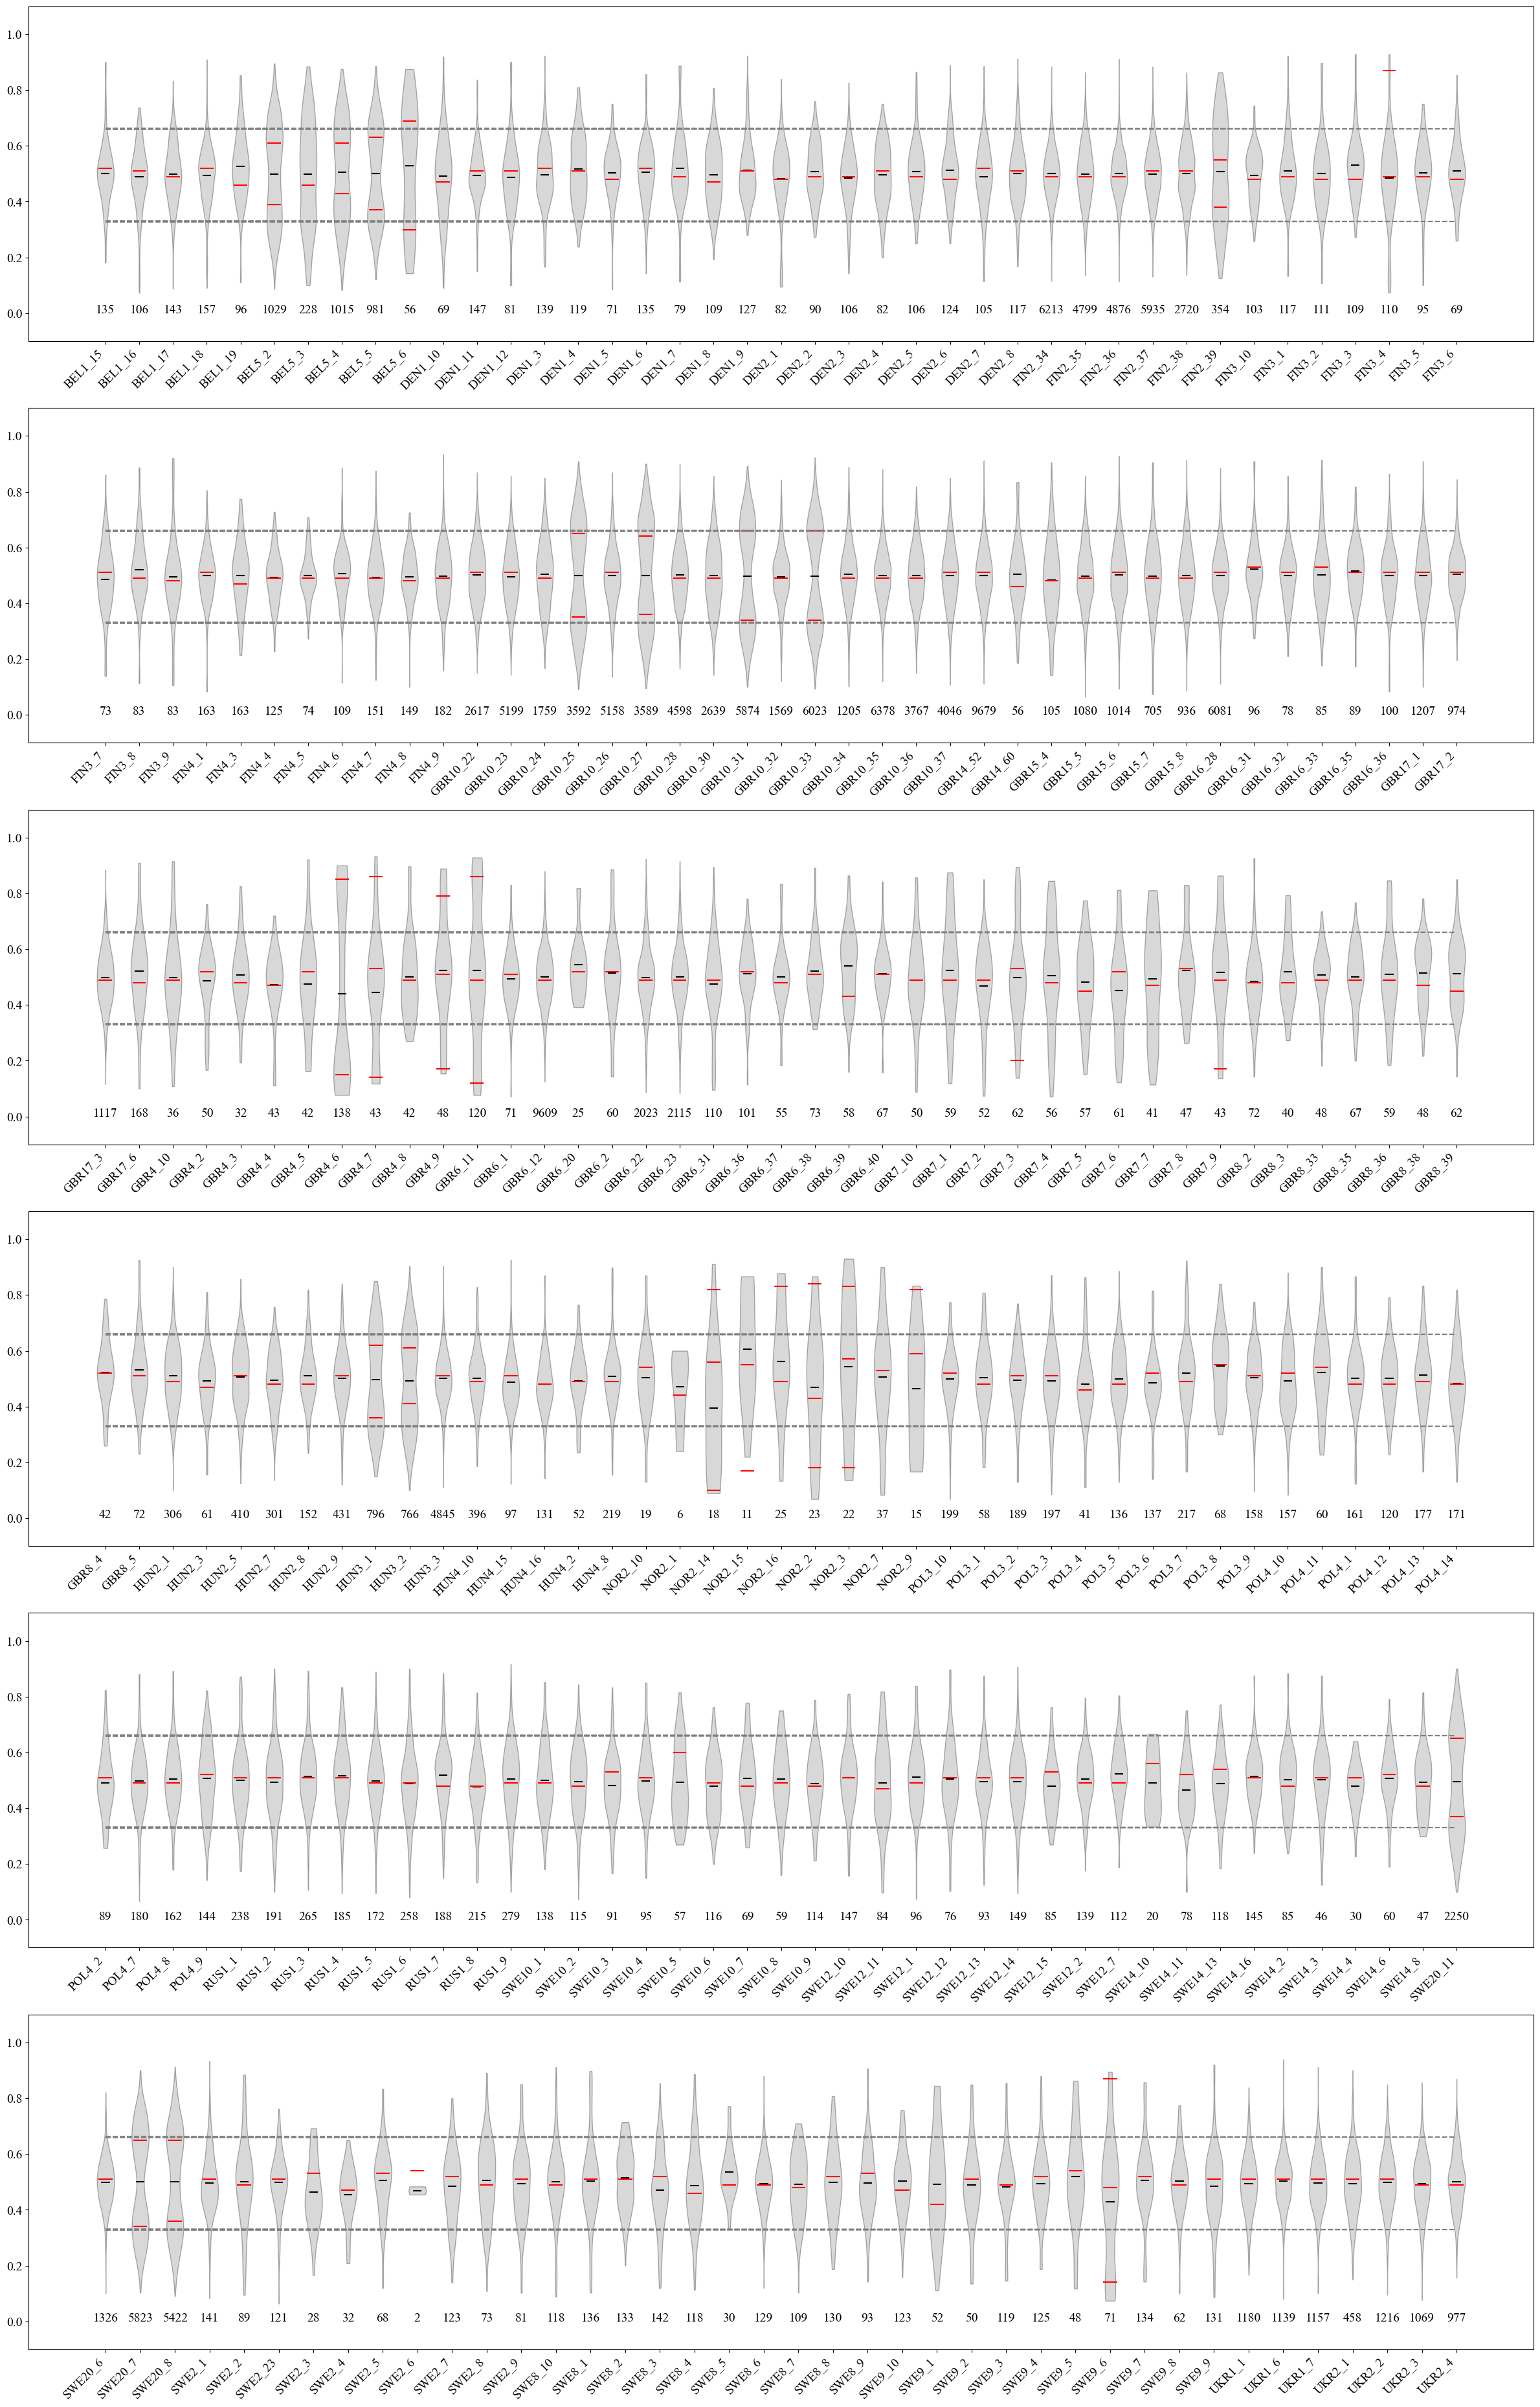

In [400]:
from matplotlib import pyplot as plt
import numpy as np


plt.figure(figsize = (30,47))


sample_start = 0
sample_end = 41
sample_step = 41

for i in range(1,7):
    
    if sample_end >= len(samples):
        sample_end = len(samples) -1
    
    plt.subplot(6,1,i)
    
    x_coord = 1
    xcoords = []
    xlabs = []

    for sample in samples[sample_start:sample_end]:
        if len(cov_ratios[sample]) > 1:
            xcoords.append(x_coord)
            xlabs.append(sample)
            vio = plt.violinplot(cov_ratios[sample], positions = [x_coord], showmeans = True, showextrema = False)
            for pc in vio["bodies"]:
                pc.set_facecolor('grey')
                pc.set_edgecolor('Black')
            vio["cmeans"].set_edgecolor("Black")
            #plt.scatter([x_coord]*len(cov_ratios[sample]), cov_ratios[sample], s = 0.8, c = "grey")
            plt.hlines(0.33,1,max(xcoords), linestyles="dashed", color = "grey")
            plt.hlines(0.66,1,max(xcoords), linestyles="dashed", color = "grey")
            plt.text(x_coord, 0.0, "%s" % len(cov_ratios[sample]), ha = "center")
            
            ## Add the mode identification results
            
            plt.hlines(Modes[sample], x_coord-0.2, x_coord+0.2, color = "red")
                        
            x_coord += 1
       
        plt.xticks(xcoords, xlabs, rotation = 45, ha = "right")
        plt.ylim(-0.1,1.1)
            
    sample_start += sample_step
    sample_end += sample_step
    
plt.show()


There are a lot of terminal "maxima" which can't be real, but just a result of the KDE at the tips being based on only a few samples there. Lets take a look at one of these

### Testing for SWE8_6 

0.03506327659742045


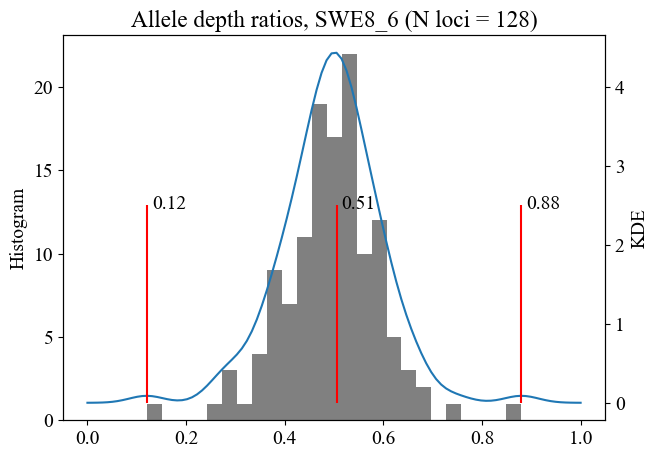

In [401]:

## prepare data
mydata = np.array(cov_ratios["SWE8_6"])
X = mydata[:, np.newaxis]

## Find best bandwidth for the data
scott_bandwidth_gauss = select_bandwidth(X, bw = 'scott', kernel = 'gauss')[0]
print(scott_bandwidth_gauss)

# Make a Gaussian KDE model using an arbitrarily defined bandwidth
kde = KernelDensity(kernel="gaussian", bandwidth=scott_bandwidth_gauss).fit(X)

# Make a set of X values to plot using this KDE
X_plot = np.linspace(0, 1, 100)[:, np.newaxis]

# Generate the Y values (i.e. the density using the KDE model and the supplied X values)
log_dens = kde.score_samples(X_plot)

## Now get the maximal inflexion points (i.e. the peaks of the distributions, which correspond to the modes in the dataset)
idx = getExtremePoints(log_dens, typeOfInflexion = "max")

# plot
plt.figure(figsize = (7,5))

plt.hist(mydata, bins=25, color = "grey")
plt.ylabel("Histogram")
plt.twinx()
plt.plot(X_plot, np.exp(log_dens))
plt.ylabel("KDE")
plt.title("Allele depth ratios, SWE8_6 (N loci = 128)")

for i in idx:
    plt.vlines(X_plot[i], 0,2.5 , color = 'red')
    plt.text(X_plot[i]+0.01, 2.45, "%s" % np.round(X_plot[i][0],2))
    
plt.show()

Yeh so there are two single points that are causing these extra maxima. Below I manually set a higher bandwidth, but this kind of defeats the purpose of a stistical (i.e. non arbitrary) criteria for finding modes. 

0.03506327659742045


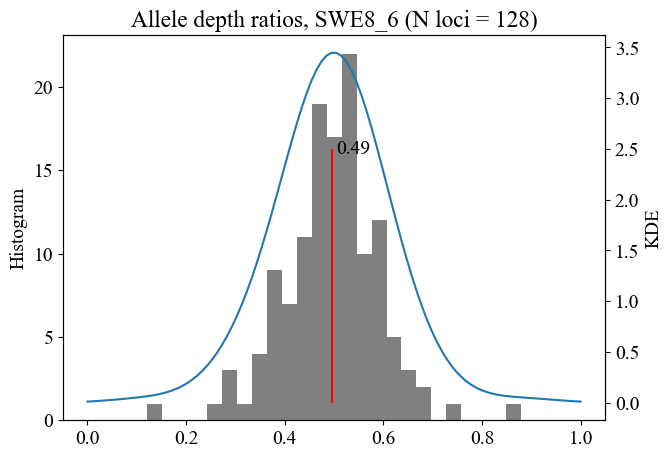

In [402]:
BW = 0.075

## prepare data
mydata = np.array(cov_ratios["SWE8_6"])
X = mydata[:, np.newaxis]

## Find best bandwidth for the data
scott_bandwidth_gauss = select_bandwidth(X, bw = 'scott', kernel = 'gauss')[0]
print(scott_bandwidth_gauss)

# Make a Gaussian KDE model using an arbitrarily defined bandwidth
kde = KernelDensity(kernel="gaussian", bandwidth=BW).fit(X)

# Make a set of X values to plot using this KDE
X_plot = np.linspace(0, 1, 100)[:, np.newaxis]

# Generate the Y values (i.e. the density using the KDE model and the supplied X values)
log_dens = kde.score_samples(X_plot)

## Now get the maximal inflexion points (i.e. the peaks of the distributions, which correspond to the modes in the dataset)
idx = getExtremePoints(log_dens, typeOfInflexion = "max")

# plot
plt.figure(figsize = (7,5))

plt.hist(mydata, bins=25, color = "grey")
plt.ylabel("Histogram")
plt.twinx()
plt.plot(X_plot, np.exp(log_dens))
plt.ylabel("KDE")
plt.title("Allele depth ratios, SWE8_6 (N loci = 128)")

for i in idx:
    plt.vlines(X_plot[i], 0,2.5 , color = 'red')
    plt.text(X_plot[i]+0.01, 2.45, "%s" % np.round(X_plot[i][0],2))
    
plt.show()

But lets see how this affects all samples, using a bandwith of 0.075

In [18]:
Modes = {}

for sample in cov_ratios:
    
    Modes[sample] = Get_modes(cov_ratios[sample], 0.09)

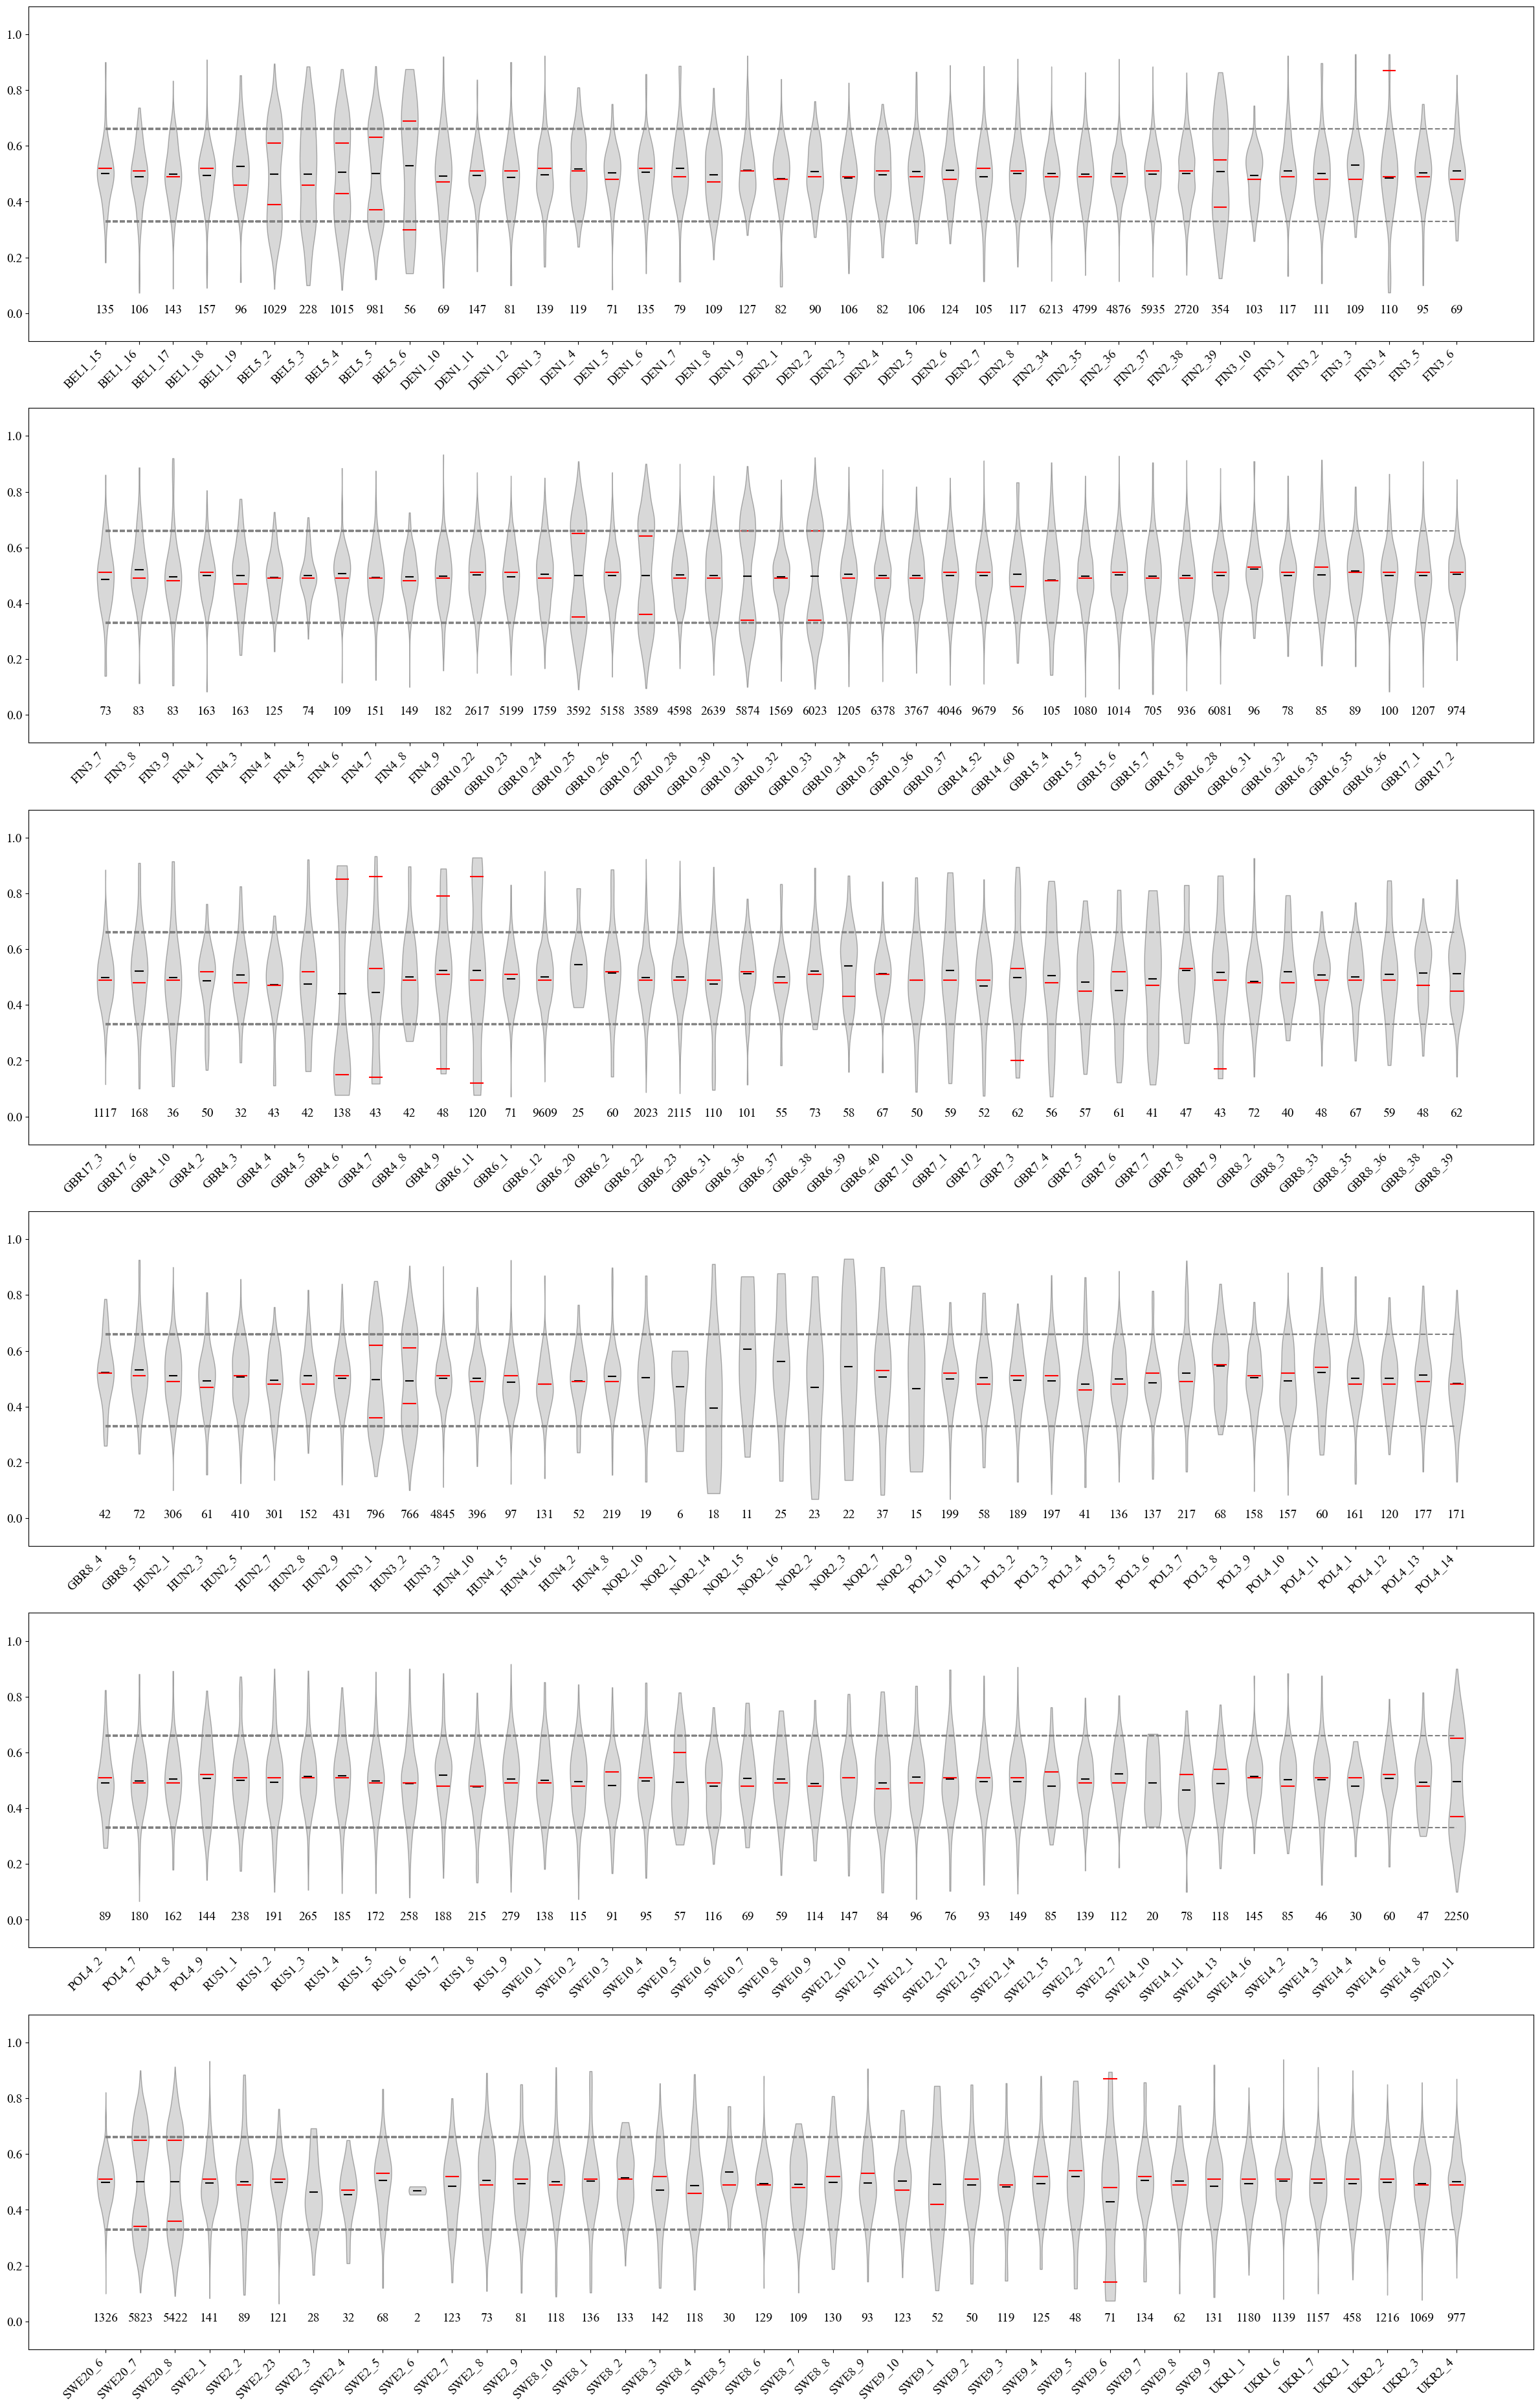

In [403]:
from matplotlib import pyplot as plt
import numpy as np


plt.figure(figsize = (30,47))


sample_start = 0
sample_end = 41
sample_step = 41

for i in range(1,7):
    
    if sample_end >= len(samples):
        sample_end = len(samples) -1
    
    plt.subplot(6,1,i)
    
    x_coord = 1
    xcoords = []
    xlabs = []

    for sample in samples[sample_start:sample_end]:
        if len(cov_ratios[sample]) > 1:
            xcoords.append(x_coord)
            xlabs.append(sample)
            vio = plt.violinplot(cov_ratios[sample], positions = [x_coord], showmeans = True, showextrema = False)
            for pc in vio["bodies"]:
                pc.set_facecolor('grey')
                pc.set_edgecolor('Black')
            vio["cmeans"].set_edgecolor("Black")
            #plt.scatter([x_coord]*len(cov_ratios[sample]), cov_ratios[sample], s = 0.8, c = "grey")
            plt.hlines(0.33,1,max(xcoords), linestyles="dashed", color = "grey")
            plt.hlines(0.66,1,max(xcoords), linestyles="dashed", color = "grey")
            plt.text(x_coord, 0.0, "%s" % len(cov_ratios[sample]), ha = "center")
            
            ## Add the mode identification results - only doing this for samples with > 50 loci, as it gets messy below that point
            
            if len(cov_ratios[sample]) >= 30:
                plt.hlines(Modes[sample], x_coord-0.2, x_coord+0.2, color = "red")
                        
            x_coord += 1
       
        plt.xticks(xcoords, xlabs, rotation = 45, ha = "right")
        plt.ylim(-0.1,1.1)
            
    sample_start += sample_step
    sample_end += sample_step
    
plt.savefig("/Users/dj20y461/Dropbox/PhD/Dans_PhD_Shared/Papers/Hybridisation paper/Figures/SUPP/Allele_depth_ratios_raw.pdf")
plt.show()


I think in the end I will stick with this manually set bandwidth. And I may also manually remove the few remaining extrema that are clearly at the tips of distributions in very low-data regions e.g. in DEN1_7, GBR7_9, GBR4_5. I'm sure someone more mathematically inclined would know a way to deal with this issue, but given the results of this analysis are relatively clear (i.e. there are some clear triploids here, which was not expected), these small loose ends will not affect the overall result.

### Finding the direction of hybridisation in polyploids. 

There are several (more) polyploids (than we initially thought) in this dataset. And this is important for our story about hybridisation in this system. Is it F1's hybridising with eachother that is causing the triploids? Or is it the F1s backcrossing? We could tell these apart if we knew which of the genomes was present twice in each hybrid. If it is always the genome of <i>C. carassius</i> for example, then that would be good evidence that triploids are produced via backcrossing between F1s and pure <i>C. carassius</i>. However, If both genomes were found in two copies across hybrids, then it could be either F1s mating with each other, or F1s backcrossing with both parentals. So it is worthwhile knowing. 

I will do this first by identifying which of the alleles are highest coverage in each hybrid, and then finding which species those alleles come from. 

Note that this analysis can also act as a validation of the hypothesis that these individuals are indeed triploid. In the case of triploidy, we expect that only one of the two genomes will be in two copies. Thus all of the higher-coverage alleles should come from a single species. 

<b>Samples to examine</b> (based on the plots made above) 

<b><i>C. carassius x C. a. auratus</i></b> (F1)
- GBR10_25
- GBR10_27
- GBR10_31
- GBR10_33

<b><i>C. carassius x C. a. gibelio</i></b> (F1)
- SWE20_7
- SWE20_8
- SWE20_11




### C. carassius x C. a. auratus triploid hybrids

So the first step is to choose a pairwise comparison and identify which alleles are species-diagnostic. 

Best way to do this would be to find loci with high (and significant) Fst between the two species, and then find which allele is present in each. I will calculate Fst using Stacks. 

In [329]:
def find_spp_diagnostic_loci(PW_Fst_path, p_thresh = 0.001):

    diagnostic_loci = []

    with open(PW_Fst_path) as PW_Fst:

        headers = next(PW_Fst)

        for line in PW_Fst:
            locID = "%s_%s" % (line.split()[0], line.split()[5])
            AMOVA_Fst = float(line.split()[7])
            Fst_Pval = float(line.split()[8])

            if all([AMOVA_Fst == 1,
                    Fst_Pval < p_thresh]):
                diagnostic_loci.append(locID)
                
    return diagnostic_loci
        

In [330]:
PW_Fst_CcxCa_path = "/Users/dj20y461/Data_temp/Carassius/triploids_analysis/populations.fst_C_carassius-C_a_auratus.tsv"

CcxCa_diagnostic_loci = find_spp_diagnostic_loci(PW_Fst_CcxCa_path)

In [ ]:
print("So there are %s diagnostic loci between Cc and Caa" % len(CcxCa_diagnostic_loci))

So there are 22495 diagnostic loci between Cc and Caa


Next, find which allele is diagnostic for which species. To do this I will use the summary stats from Stacks, which has the allele frequencies of each locus in each population. 

In [332]:
populations_sumstats_path = "/Users/dj20y461/Data_temp/Carassius/triploids_analysis/populations.sumstats.tsv"

In [336]:
def get_spp_specific_alleles(populations_sumstats_path, diagnostic_loci, pop1, pop2):

    diagnostic_alleles = {}

    with open(populations_sumstats_path) as populations_sumstats:

        for line in populations_sumstats:

            if not line.startswith("#"):

                locID = "%s_%s" % (line.split()[0], int(line.split()[3])+1) ## note the +1 because the sumstats column numbers are -1 the column numbers in the VCF. 
                pop = line.split()[4]
                P_nuc = line.split()[5]
                P = float(line.split()[8])
                Q_nuc = line.split()[6]

                if locID in diagnostic_loci: ## if locus has Fst = 1 between pop1 and pop2

                    if pop == pop1: ## if the line holds info for pop1
                        
                        #print(locID, pop)

                        if locID not in diagnostic_alleles: ## if locID not already in the dictionary (can be added if either pop1 or pop2 is found in file first) 

                            diagnostic_alleles[locID] = {}

                        diagnostic_alleles[locID][pop1] = {}

                        if P == 1: ## if the major allele freq is 1, then record the major allele nucleotide
                            diagnostic_alleles[locID][pop1]["nuc"] = P_nuc

                        elif P == 0:  ## else if the major allele freq is 0, then record the minor allele nucleotide
                            diagnostic_alleles[locID][pop1]["nuc"] = Q_nuc


                    elif pop == pop2: ## else, if the line holds info for pop2
                        
                        #print(locID, pop)

                        if locID not in diagnostic_alleles:

                            diagnostic_alleles[locID] = {}

                        diagnostic_alleles[locID][pop2] = {}

                        if P == 1:
                            diagnostic_alleles[locID][pop2]["nuc"] = P_nuc

                        elif P == 0:
                            diagnostic_alleles[locID][pop2]["nuc"] = Q_nuc

                
    return diagnostic_alleles

In [337]:
populations_sumstats_path = "/Users/dj20y461/Data_temp/Carassius/triploids_analysis/populations.sumstats.tsv"

CcxCa_diagnostic_alleles = get_spp_specific_alleles(populations_sumstats_path,
                                                    CcxCa_diagnostic_loci,
                                                    "C_carassius",
                                                    "C_a_auratus")

Cool, so now I know, for loci with high Fst between the two species, which allele belongs to each species. . . . 

So finally I need to go through the allele coverages for these loci in the hybrids, and simply find the highest and lowest. 

In [423]:
def get_diagnostic_allele_depths(samples, outdir, diagnostic_alleles, pop1, pop2):
    
    """
    samples               -  list of samples to use
    outdir                -  directory to put outputs
    diagnostic_alleles    -  dictionary of diagnostic alleles per locus (from get_spp_specific_alleles()) 
    pop1                  -  name of population/sp 1
    pop2                  -  name of population/sp 2
    
    """

    with open("%sdiagnostic_allele_depths.tsv" % outdir, 'w') as sample_outs:

        sample_outs.write(("Sample\tLocus\t%s_NUC\t%s_depth\t%s_NUC\t%s_depth\n" % (pop1, pop1, pop2, pop2)))

        pop1_depths = []
        pop2_depths = []
        pop1_vs_pop2_depths = [] ## pop1 depths divided by pop2 depths

        position = 1
        xcoords = []
        xlabs = []
        max_y_coords = []

        for sample in samples:
            #print(sample)
            
            N_loci_used = 0 

            for locus in cov_loci[sample]:
                if locus in diagnostic_alleles:

                    if "nuc" in diagnostic_alleles[locus][pop1] and "nuc" in diagnostic_alleles[locus][pop2]:

                        pop1_allele = diagnostic_alleles[locus][pop1]["nuc"]
                        pop2_allele = diagnostic_alleles[locus][pop2]["nuc"]

                        pop1_depth = cov_loci[sample][locus][pop1_allele]
                        pop2_depth = cov_loci[sample][locus][pop2_allele]

                        pop1_depths.append(int(pop1_depth))
                        pop2_depths.append(int(pop2_depth))

                        pop1_over_pop2_ratio = pop1_depth/(pop1_depth+pop2_depth)
                        
                        pop1_vs_pop2_depths.append(pop1_over_pop2_ratio)
                        
                        N_loci_used += 1

                        sample_outs.write("%s\t%s\t%s\t%s\t%s\t%s\n" % (sample, locus, pop1_allele, pop1_depth, pop2_allele, pop2_depth))

            vio = plt.violinplot(pop1_vs_pop2_depths, positions = [position], showmeans = True, showextrema = False)

            plt.text(position, 0.2, "%s" % N_loci_used, ha = "center")
            
            for pc in vio["bodies"]:
                    pc.set_facecolor('grey')
                    pc.set_edgecolor('Black')
            vio["cmeans"].set_edgecolor("Black")

            xcoords.append(position)
            xlabs.append(sample)
            position += 1
            max_y_coords.append(max(pop1_vs_pop2_depths))
            
            

    plt.hlines(0.66,0.5,max(xcoords)+0.5, linestyles="dashed", color = "grey")    
    plt.hlines(0.33,0.5,max(xcoords)+0.5, linestyles="dashed", color = "grey")
    
    plt.ylabel("%s allele depth / total depth" % (pop1))
    plt.ylim(0, max(max_y_coords)+0.2)
    plt.xticks(xcoords, xlabs, rotation = 45, ha = "right")
    plt.savefig("%s_polarised_allele_depth_ratios.pdf" % outdir)
    plt.show()
    
    return pop1_vs_pop2_depths
                     

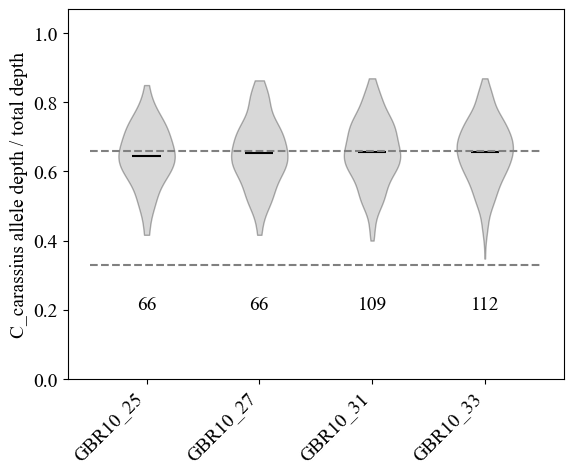

In [424]:
CcarxCaur_samples = ["GBR10_25",
                     "GBR10_27",
                     "GBR10_31",
                     "GBR10_33"]

CcarxCaur_allele_depths  = get_diagnostic_allele_depths(CcarxCaur_samples,
                                                        "/Users/dj20y461/Data_temp/Carassius/triploids_analysis/CcxCa_",
                                                        CcxCa_diagnostic_alleles,
                                                        "C_carassius",
                                                        "C_a_auratus")

### C. carassius x C. a. gibelio triploid hybrids


Find species-diagnostic loci

In [180]:
PW_Fst_CcxCg_path = "/Users/dj20y461/Data_temp/Carassius/triploids_analysis/populations.fst_C_carassius-C_a_gibelio.tsv"

CcxCg_diagnostic_loci = find_spp_diagnostic_loci(PW_Fst_CcxCg_path)

In [319]:
print("There are %s diagnostic loci between Cc and Cg" % len(CcxCg_diagnostic_loci))

There are 23190 diagnostic loci between Cc and Cg


Find diagnostic allele for each species

In [182]:
populations_sumstats_path = "/Users/dj20y461/Data_temp/Carassius/triploids_analysis/populations.sumstats.tsv"

CcxCg_diagnostic_alleles = get_spp_specific_alleles(populations_sumstats_path,
                                                    CcxCg_diagnostic_loci,
                                                    "C_carassius",
                                                    "C_a_gibelio")

In [410]:
cov_loci["BEL5_6"]

{'1110_51': {'C': 26, 'A': 6},
 '1169_30': {'G': 13, 'A': 8},
 '1316_41': {'C': 17, 'T': 7},
 '5332_41': {'C': 6, 'T': 15},
 '5332_63': {'C': 6, 'A': 15},
 '6284_7': {'G': 16, 'T': 4},
 '7375_60': {'C': 16, 'T': 6},
 '7375_78': {'C': 16, 'A': 6},
 '7375_81': {'G': 16, 'A': 6},
 '7375_86': {'G': 6, 'A': 16},
 '8508_69': {'T': 9, 'C': 11},
 '10031_32': {'G': 13, 'A': 10},
 '10894_51': {'T': 11, 'C': 10},
 '12182_61': {'C': 14, 'T': 7},
 '12226_20': {'G': 16, 'A': 6},
 '13483_42': {'A': 14, 'T': 8},
 '14035_83': {'A': 15, 'T': 8},
 '14788_68': {'G': 17, 'A': 8},
 '14788_79': {'C': 17, 'T': 8},
 '15020_82': {'A': 15, 'G': 5},
 '16178_80': {'G': 9, 'A': 12},
 '17850_44': {'T': 11, 'A': 9},
 '18254_32': {'G': 18, 'T': 4},
 '21803_29': {'G': 14, 'T': 7},
 '24490_53': {'T': 7, 'A': 13},
 '25143_70': {'C': 14, 'T': 6},
 '25177_27': {'G': 24, 'A': 4},
 '25871_8': {'A': 15, 'G': 5},
 '25921_64': {'G': 17, 'T': 3},
 '26160_50': {'T': 14, 'A': 7},
 '27051_50': {'C': 3, 'T': 18},
 '29750_45': {'C': 

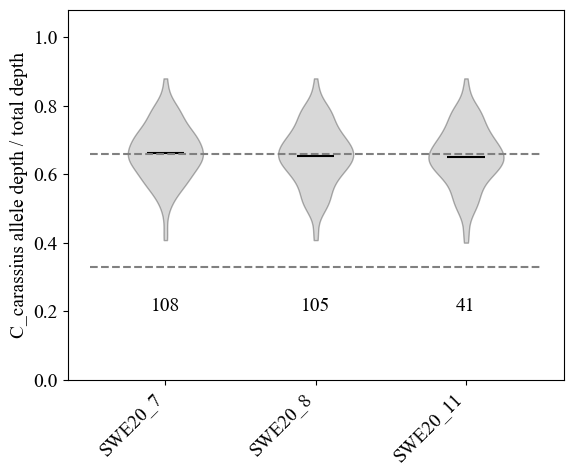

In [426]:
CcxCg_samples = ["SWE20_7",
                 "SWE20_8",
                 "SWE20_11"]

CcarxCg_allele_depths = get_diagnostic_allele_depths(CcxCg_samples,
                                                     "/Users/dj20y461/Data_temp/Carassius/triploids_analysis/CcxCg_",
                                                     CcxCg_diagnostic_alleles,
                                                     "C_carassius",
                                                     "C_a_gibelio")

So we only have 3 here, but the allele ratios again support a Cc/Cc/Cg genome composition. 